> # 🕒 Time Series Forecasting And Portfolio Optimization For Guide Me in Finance (GMF) Investments

> ### 📂 Add Root Directory and Ignore Warnind

In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')


> ### 🗂️ Import Vecessarily Library

In [2]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore
import yfinance as yf # type: ignore
from statsmodels.tsa.seasonal import seasonal_decompose # type: ignore


>### 🎯 This Project is focus on Apply time series forcasting to historical data to enhance portfolio management strategies

> ### 👉 The Steps:
>  ####  1️⃣. Extract historical data ✅
>  ####  2️⃣. Preprocess and analyze this data to identify trends and patterns. ✅
>  ####  3️⃣. Develop and evaluate forecasting models to predict future market movements. ✅
>  ####  4️⃣. Recommending portfolio adjustments 

> ## ♻️ Data Preprocessing and Exploratory Data Analysis (EDA)

> > ##### Prepare and understand the historical financial data for Tesla, BND, and SPY over the period from January 1, 2015, to October 31, 2024, using YFinance

In [3]:
from scripts.portfolio import loadData
tsla_data, bnd_data, spy_data = loadData()



2024-11-12 19:32:42.183290: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-12 19:32:42.540493: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-12 19:32:42.838939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731429163.108835    6119 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731429163.185533    6119 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 19:32:43.942395: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

> ## 🛢️ TSLA Datasets

In [4]:
rows, columns = tsla_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")



Number of rows: 2474
Number of columns: 6


In [5]:
tsla_data.head(rows)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,260.480011,260.480011,262.119995,242.649994,244.679993,204491900
2024-10-25 00:00:00+00:00,269.190002,269.190002,269.489990,255.320007,256.010010,161611900
2024-10-28 00:00:00+00:00,262.510010,262.510010,273.540009,262.239990,270.000000,107653600


In [6]:
tsla_data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03
mean,111.438965,111.438965,113.895836,108.869421,111.461872,1.125745e+08
std,110.120450,110.120450,112.643277,107.541830,110.208156,7.449619e+07
min,9.578000,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.066167,17.066167,17.368167,16.790167,17.058499,6.682590e+07
50%,25.043000,25.043000,25.279000,24.462334,24.986667,9.289395e+07
75%,216.865002,216.865002,221.910004,212.084999,217.264999,1.301899e+08
max,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08


In [7]:
tsla_data.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
tsla_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00+00:00 to 2024-10-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2474 non-null   float64
 1   High       2474 non-null   float64
 2   Low        2474 non-null   float64
 3   Close      2474 non-null   float64
 4   Adj Close  2474 non-null   float64
 5   Volume     2474 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.3 KB


> ## 🛢️ BND Datasets

In [9]:
rows, columns = bnd_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 2474
Number of columns: 6


In [10]:
bnd_data.head(rows)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00+00:00,63.358734,82.650002,82.690002,82.419998,82.430000,2218800
2015-01-05 00:00:00+00:00,63.542747,82.889999,82.919998,82.699997,82.739998,5820100
2015-01-06 00:00:00+00:00,63.726707,83.129997,83.379997,83.029999,83.029999,3887600
2015-01-07 00:00:00+00:00,63.765038,83.180000,83.279999,83.050003,83.139999,2433400
2015-01-08 00:00:00+00:00,63.665405,83.050003,83.110001,82.970001,83.110001,1873400
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,73.081184,73.309998,73.440002,73.169998,73.279999,6219500
2024-10-25 00:00:00+00:00,72.931664,73.160004,73.480003,73.129997,73.480003,4641400
2024-10-28 00:00:00+00:00,72.841942,73.070000,73.279999,72.949997,73.239998,4582800


In [11]:
bnd_data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03
mean,70.089251,80.316039,80.431152,80.198464,80.319968,4.169014e+06
std,4.889919,5.097592,5.082268,5.113232,5.100419,2.778389e+06
min,62.637585,68.040001,68.379997,67.989998,68.080002,0.000000e+00
25%,66.314087,76.379997,76.674999,76.265001,76.502501,2.024900e+06
50%,68.888947,81.410004,81.519997,81.300003,81.410004,3.710900e+06
75%,73.807495,84.010002,84.167500,83.937502,84.047503,5.519825e+06
max,79.812958,89.480003,89.589996,89.440002,89.550003,3.193720e+07


In [12]:
bnd_data.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
bnd_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00+00:00 to 2024-10-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2474 non-null   float64
 1   High       2474 non-null   float64
 2   Low        2474 non-null   float64
 3   Close      2474 non-null   float64
 4   Adj Close  2474 non-null   float64
 5   Volume     2474 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.3 KB


> ## 🛢️ SPY Datasets

In [14]:
rows, columns = spy_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 2474
Number of columns: 6


In [15]:
spy_data.head(rows)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00+00:00,173.173737,205.429993,206.880005,204.179993,206.380005,121465900
2015-01-05 00:00:00+00:00,170.046356,201.720001,204.369995,201.350006,204.169998,169632600
2015-01-06 00:00:00+00:00,168.444672,199.820007,202.720001,198.860001,202.089996,209151400
2015-01-07 00:00:00+00:00,170.543640,202.309998,202.720001,200.880005,201.419998,125346700
2015-01-08 00:00:00+00:00,173.569962,205.899994,206.160004,203.990005,204.009995,147217800
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,579.239990,579.239990,580.059998,576.570007,579.979980,34979900
2024-10-25 00:00:00+00:00,579.039978,579.039978,584.460022,578.080017,581.510010,47268200
2024-10-28 00:00:00+00:00,580.830017,580.830017,582.710022,580.520020,582.580017,30174700


In [16]:
spy_data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03
mean,310.253154,330.623634,332.368856,328.614426,330.570376,8.810268e+07
std,111.250656,103.324179,103.840765,102.719137,103.311248,4.491678e+07
min,157.328613,182.860001,184.100006,181.020004,182.339996,2.027000e+07
25%,214.822330,242.130001,243.380005,240.692501,242.302498,5.960170e+07
50%,275.812347,298.089996,299.324997,296.804993,298.095001,7.696935e+07
75%,402.297516,416.212502,418.242500,413.687500,416.240005,1.027178e+08
max,584.590027,584.590027,586.119995,582.580017,585.909973,5.072443e+08


In [17]:
spy_data.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [18]:
spy_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00+00:00 to 2024-10-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2474 non-null   float64
 1   High       2474 non-null   float64
 2   Low        2474 non-null   float64
 3   Close      2474 non-null   float64
 4   Adj Close  2474 non-null   float64
 5   Volume     2474 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.3 KB


> ### ♻️ Pre-processing

In [19]:
from scripts.portfolio import preprocess_data


> ### 🛠 Apply preprocessing to each dataset

In [20]:
tsla_data = preprocess_data(tsla_data,"TSLA")
bnd_data = preprocess_data(bnd_data,"BND")
spy_data = preprocess_data(spy_data,"SPY")


TSLA Missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
BND Missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
SPY Missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


> ### ✔ Pre-processed TSLA Datasets

In [21]:
tsla_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


> ### ✔ Pre-processed BND Datasets

In [22]:
bnd_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,63.358734,82.650002,82.690002,82.419998,82.430000,2218800
1,2015-01-05 00:00:00+00:00,63.542747,82.889999,82.919998,82.699997,82.739998,5820100
2,2015-01-06 00:00:00+00:00,63.726707,83.129997,83.379997,83.029999,83.029999,3887600
3,2015-01-07 00:00:00+00:00,63.765038,83.180000,83.279999,83.050003,83.139999,2433400
4,2015-01-08 00:00:00+00:00,63.665405,83.050003,83.110001,82.970001,83.110001,1873400


> ### ✔ Pre-processed SPY Datasets

In [23]:
spy_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,173.173737,205.429993,206.880005,204.179993,206.380005,121465900
1,2015-01-05 00:00:00+00:00,170.046356,201.720001,204.369995,201.350006,204.169998,169632600
2,2015-01-06 00:00:00+00:00,168.444672,199.820007,202.720001,198.860001,202.089996,209151400
3,2015-01-07 00:00:00+00:00,170.543640,202.309998,202.720001,200.880005,201.419998,125346700
4,2015-01-08 00:00:00+00:00,173.569962,205.899994,206.160004,203.990005,204.009995,147217800


> ## 🚀 Exploratory Data Analysis (EDA) and Outlier Detection

In [24]:
from scripts.portfolio import closePriceOverTime
from scripts.portfolio import dailyReturn
from scripts.portfolio import rollingAvgAndStd
from scripts.portfolio import timeSeriesDecomposition
from scripts.portfolio import varAndSharpeRatio
from scripts.portfolio import outlierDetection


> ### 📈 Perform EDA For TSLA

> ### 💵 Close Price Over Time

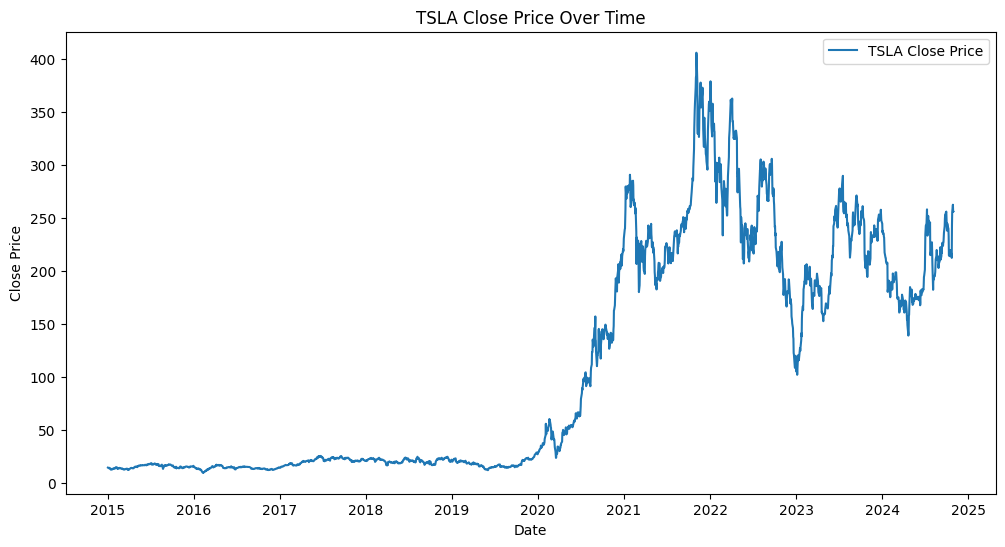

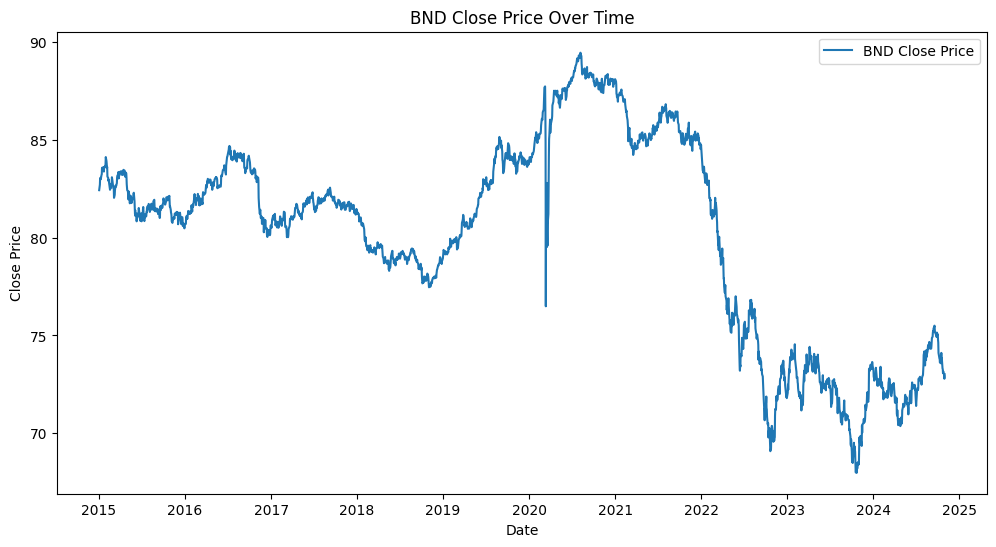

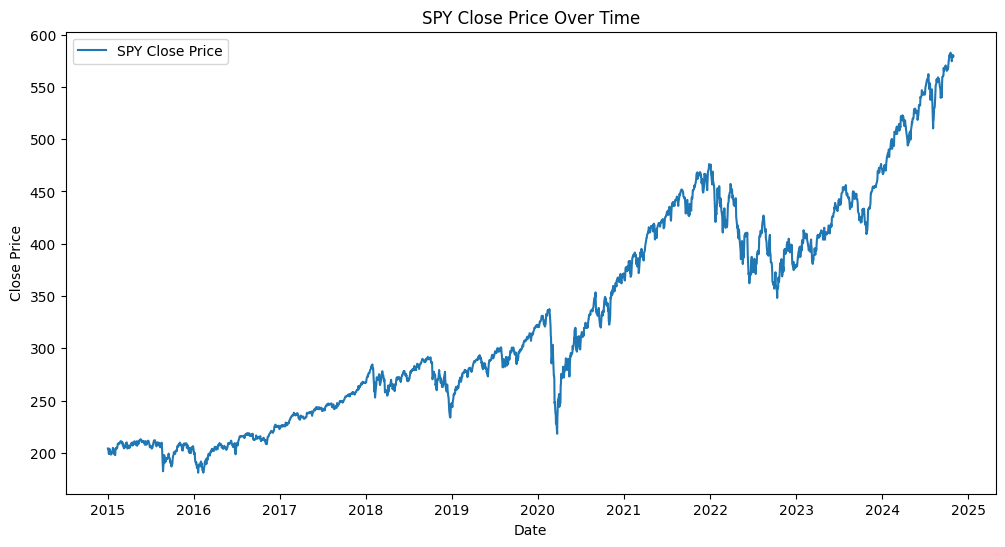

In [25]:
closePriceOverTime([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


> ### 🗓️ Daily Return

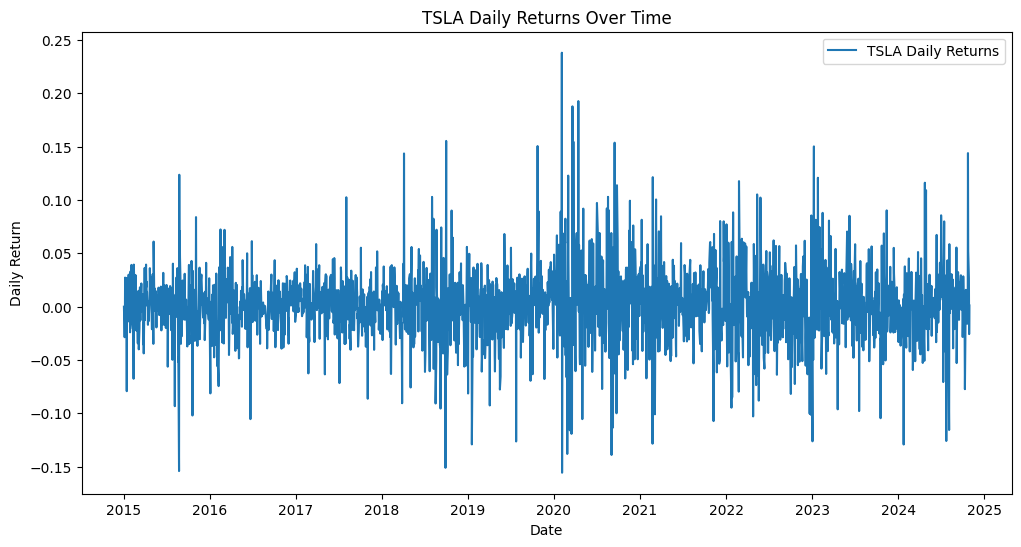

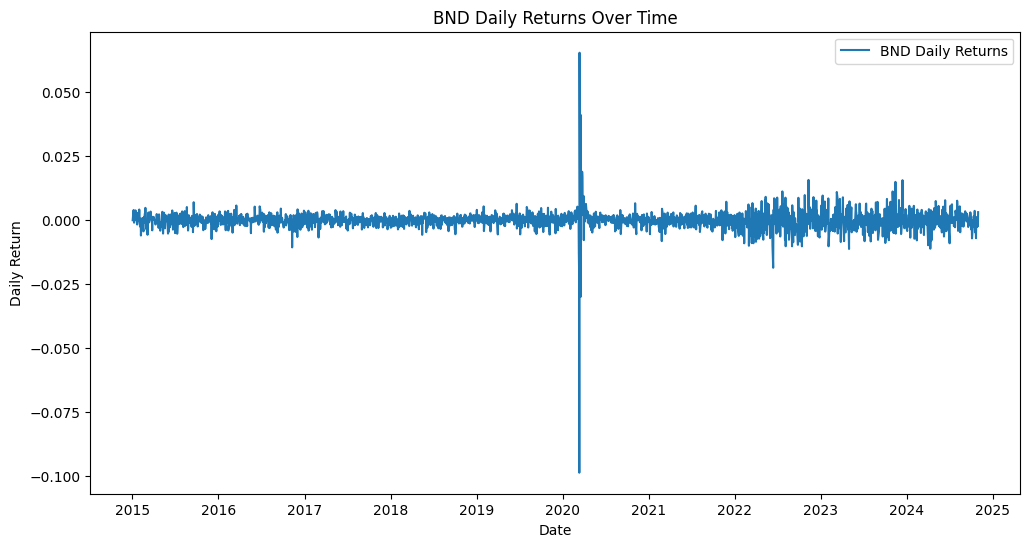

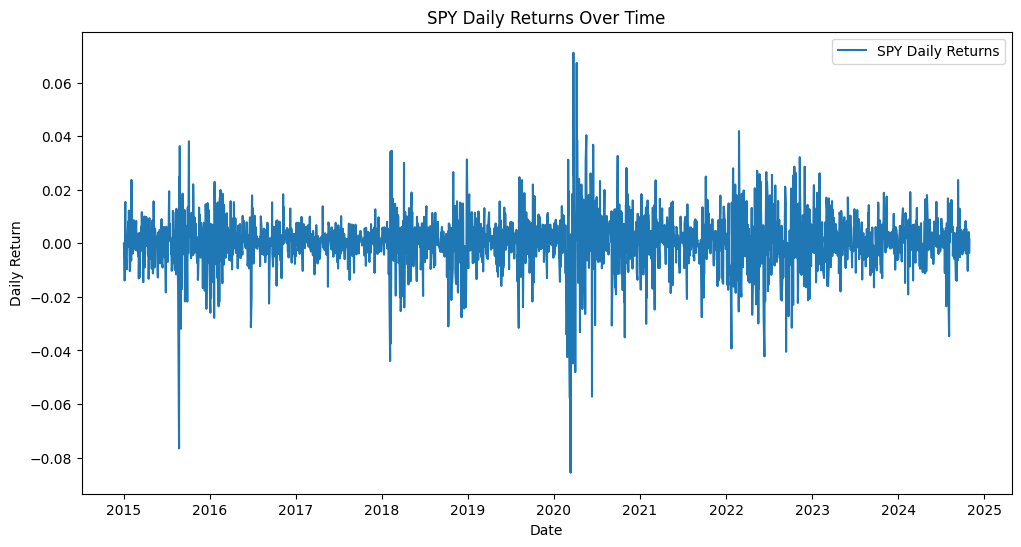

In [26]:
dailyReturn([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


> ### ➿ Rolling Average And Standard Devation

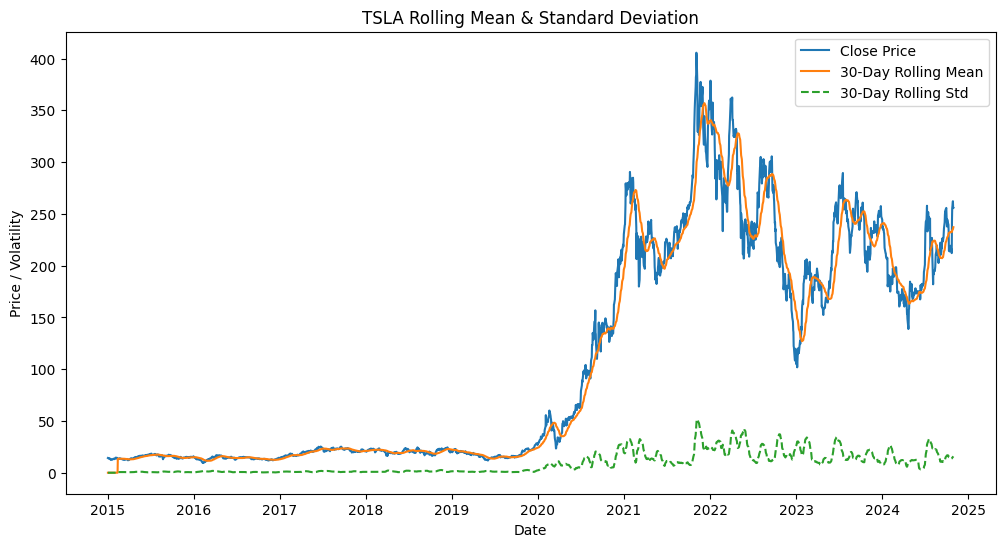

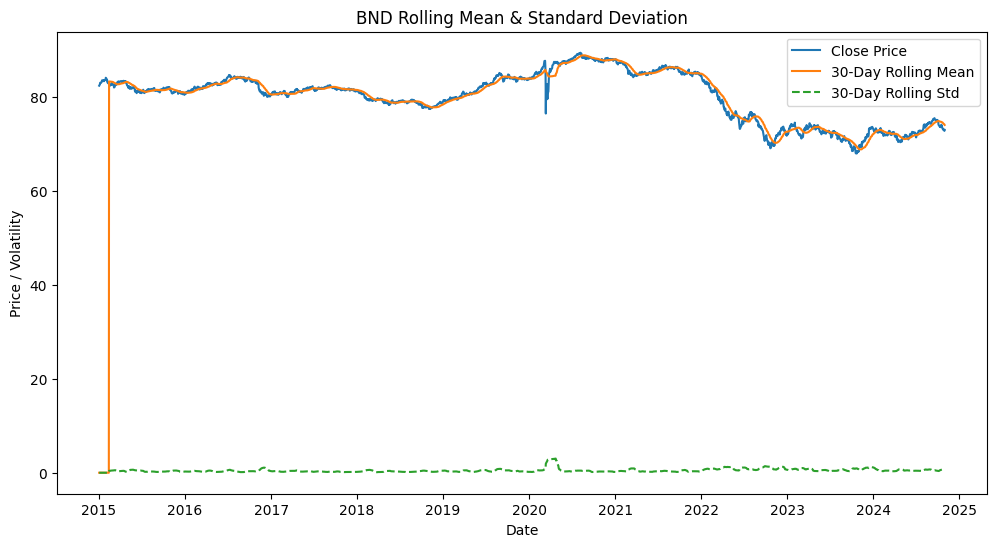

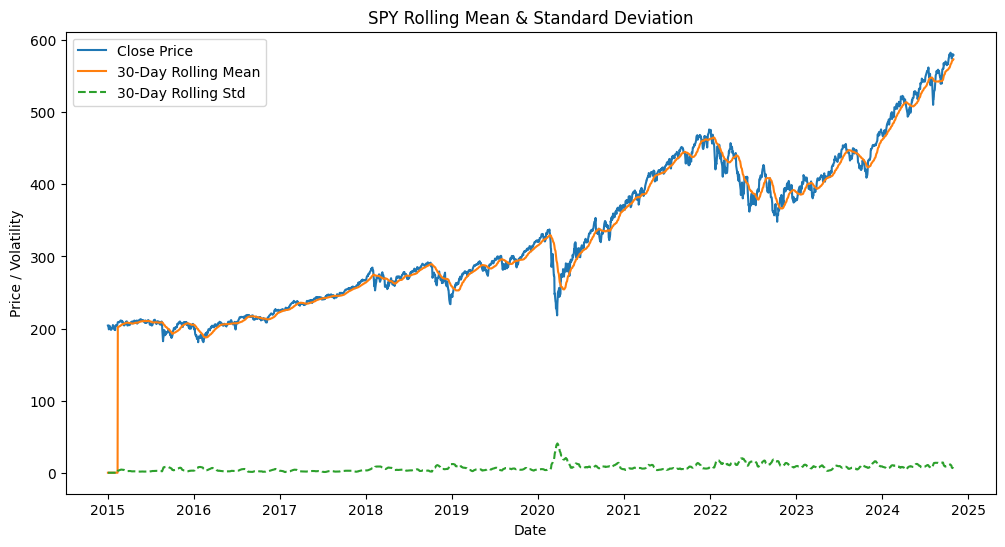

In [27]:
rollingAvgAndStd([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


> ### ❄ Time Series Decomposition

<Figure size 1200x600 with 0 Axes>

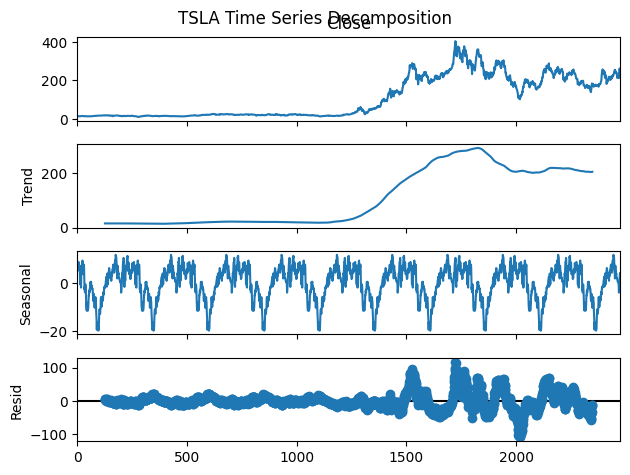

<Figure size 1200x600 with 0 Axes>

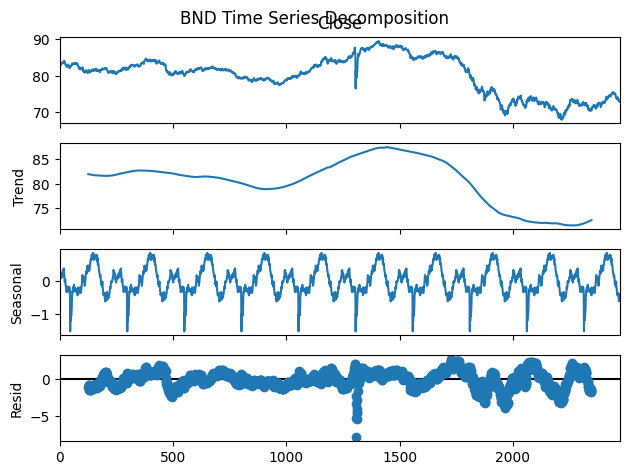

<Figure size 1200x600 with 0 Axes>

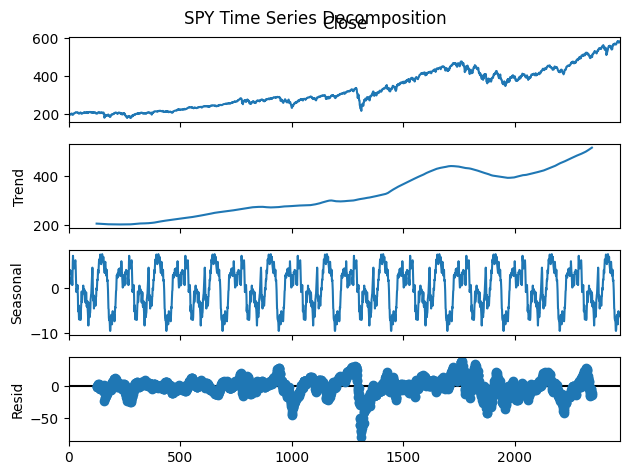

In [28]:
timeSeriesDecomposition([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


> ### ❗Value at Risk(VaR) and Sharpe Ratio

Value at Risk (VaR) at 5% confidence level for TSLA: -0.05083558590675226


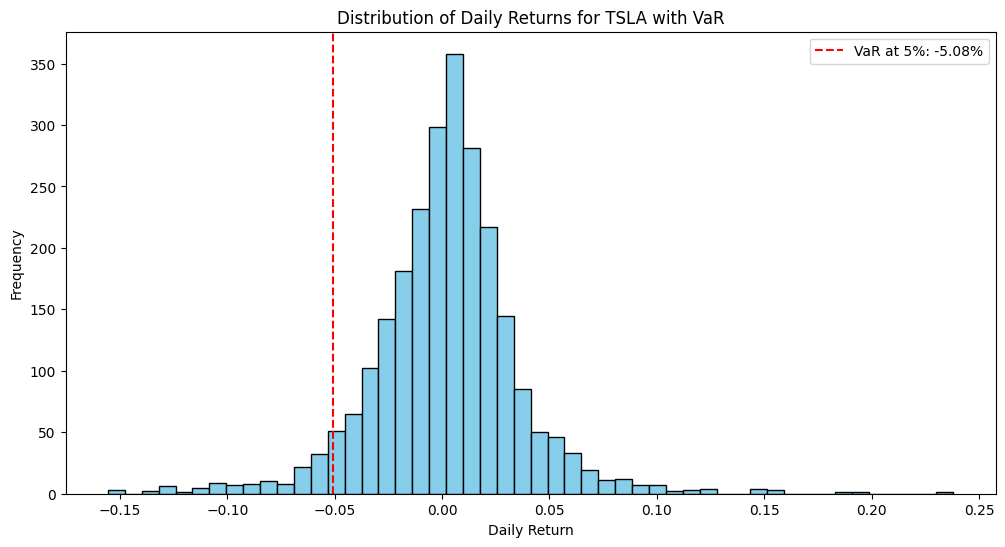

Sharpe Ratio for TSLA: 0.815075973674729


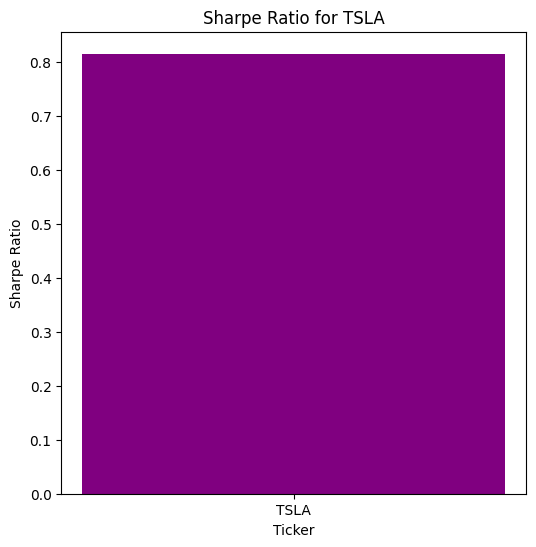

Value at Risk (VaR) at 5% confidence level for BND: -0.0047376491843876545


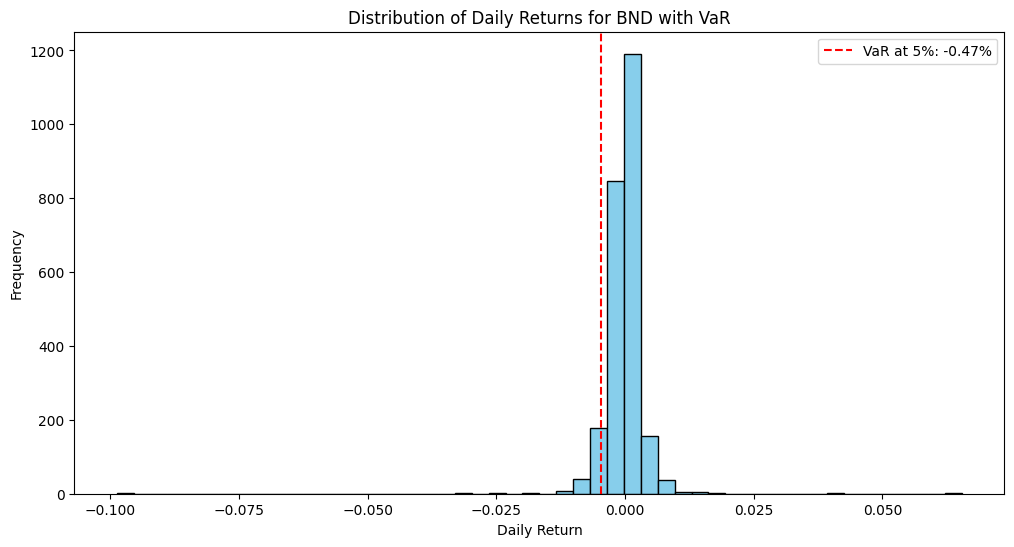

Sharpe Ratio for BND: -0.16718382598473427


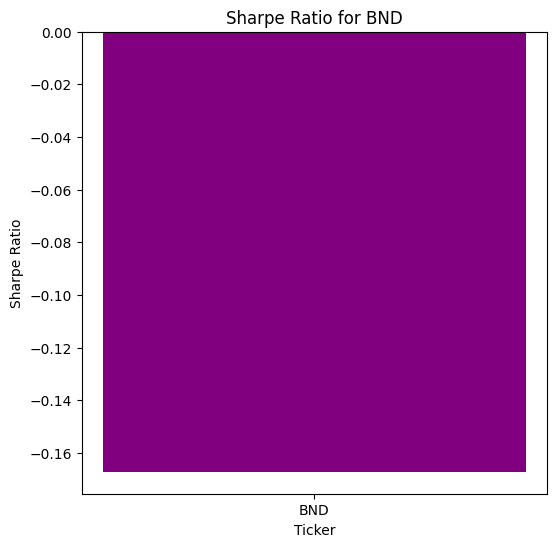

Value at Risk (VaR) at 5% confidence level for SPY: -0.015514425825437606


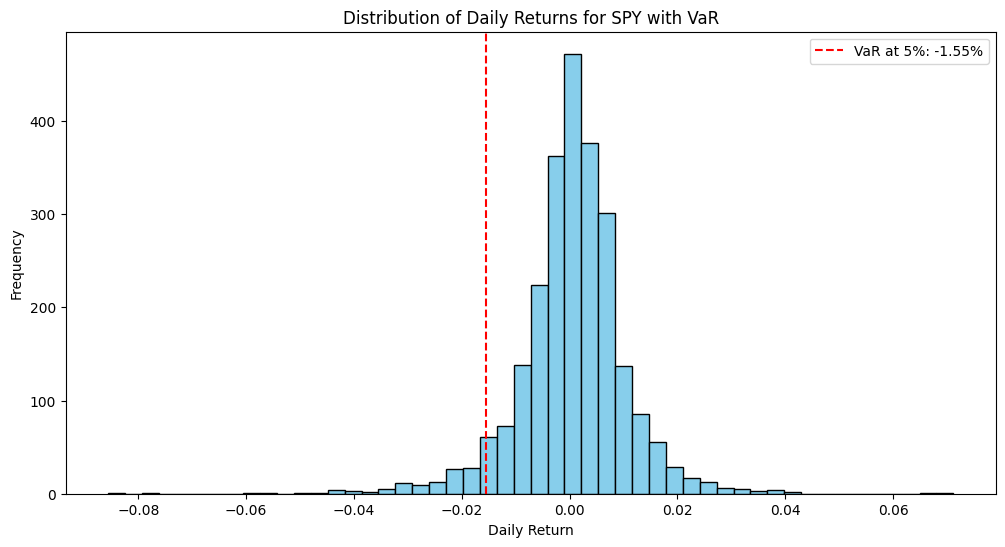

Sharpe Ratio for SPY: 0.7388478467988353


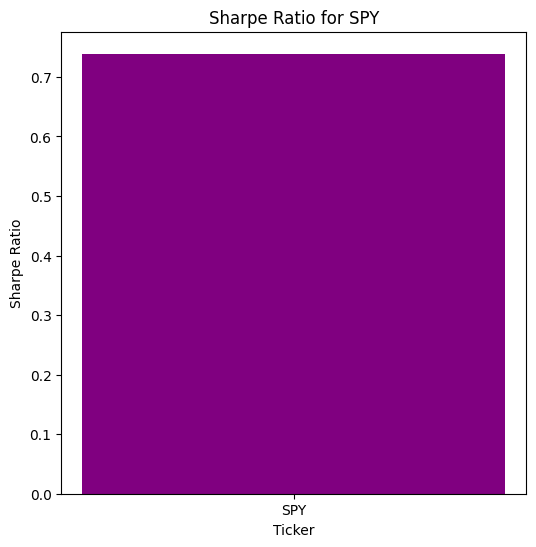

In [29]:
varAndSharpeRatio([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


> ### ☄ Outlier detection to identify significant anomalies


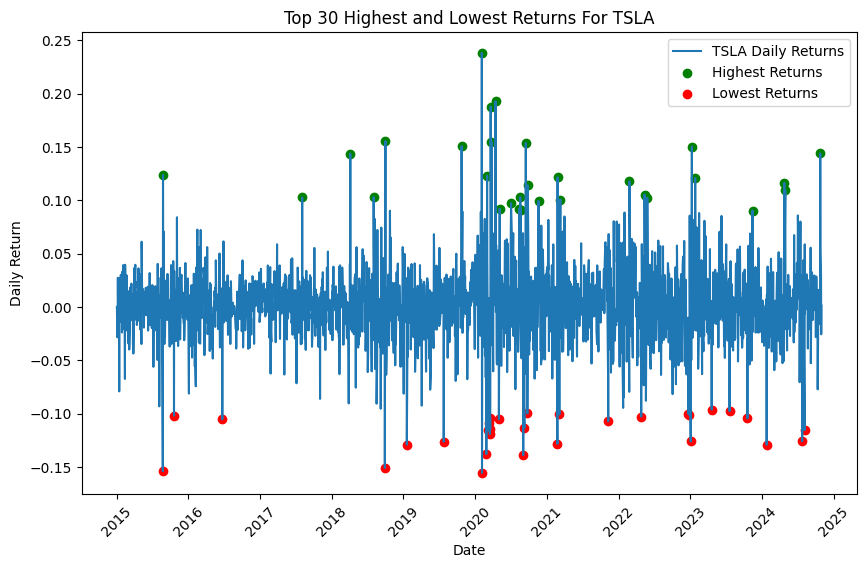

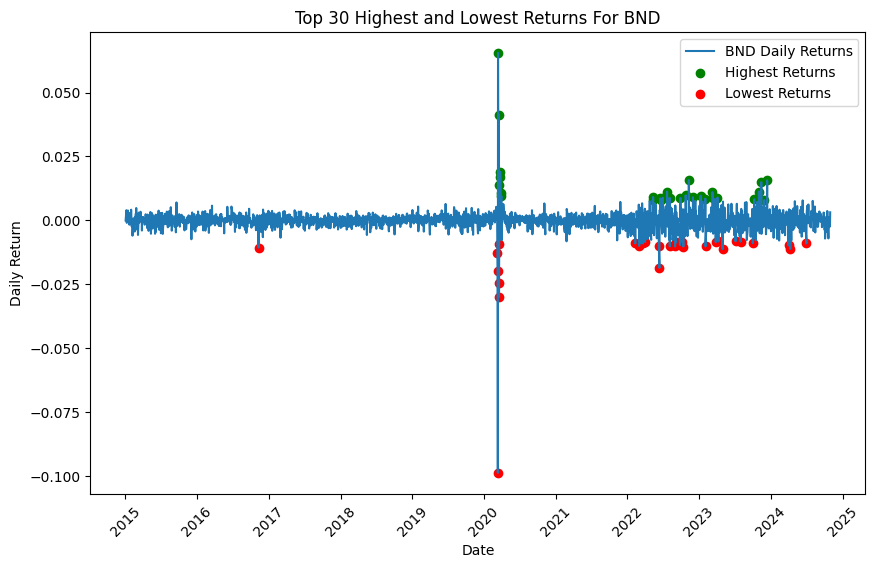

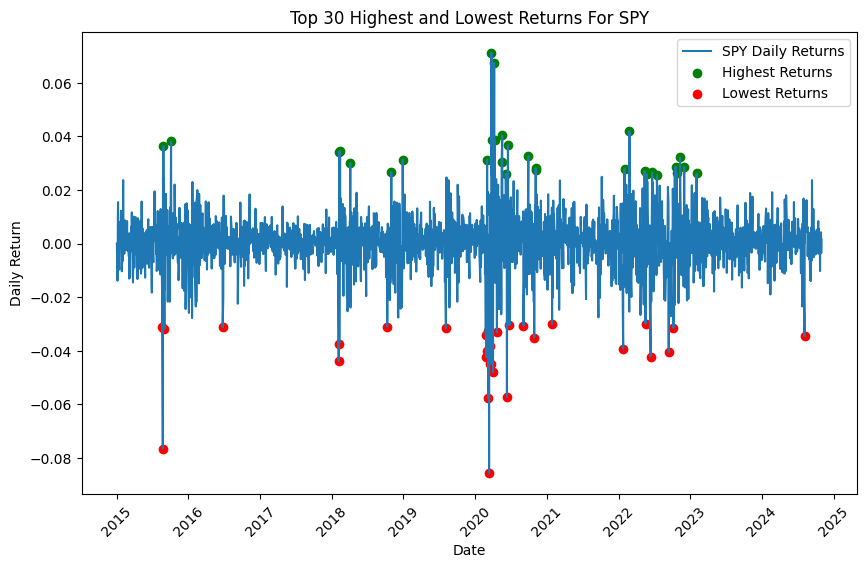

In [30]:
outlierDetection([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


> # ⚛ Develop Time Series Forecasting Models

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # type: ignore
import math


In [32]:
tsla_data.head()


,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Rolling_Mean,Rolling_Std
Date,,,,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000,0.000000,0.0,0.0
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500,-0.028604,0.0,0.0
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500,-0.014240,0.0,0.0
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000,0.027276,0.0,0.0
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500,0.001096,0.0,0.0


In [33]:
tsla_data.reset_index(inplace=True)
tsla_data.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Rolling_Mean,Rolling_Std
0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000,0.000000,0.0,0.0
1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500,-0.028604,0.0,0.0
2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500,-0.014240,0.0,0.0
3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000,0.027276,0.0,0.0
4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500,0.001096,0.0,0.0


In [34]:
bnd_data.reset_index(inplace=True)
bnd_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Rolling_Mean,Rolling_Std
0,2015-01-02 00:00:00+00:00,63.358734,82.650002,82.690002,82.419998,82.430000,2218800,0.000000,0.0,0.0
1,2015-01-05 00:00:00+00:00,63.542747,82.889999,82.919998,82.699997,82.739998,5820100,0.003397,0.0,0.0
2,2015-01-06 00:00:00+00:00,63.726707,83.129997,83.379997,83.029999,83.029999,3887600,0.003990,0.0,0.0
3,2015-01-07 00:00:00+00:00,63.765038,83.180000,83.279999,83.050003,83.139999,2433400,0.000241,0.0,0.0
4,2015-01-08 00:00:00+00:00,63.665405,83.050003,83.110001,82.970001,83.110001,1873400,-0.000963,0.0,0.0


In [35]:
spy_data.reset_index(inplace=True)
spy_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Rolling_Mean,Rolling_Std
0,2015-01-02 00:00:00+00:00,173.173737,205.429993,206.880005,204.179993,206.380005,121465900,0.000000,0.0,0.0
1,2015-01-05 00:00:00+00:00,170.046356,201.720001,204.369995,201.350006,204.169998,169632600,-0.013860,0.0,0.0
2,2015-01-06 00:00:00+00:00,168.444672,199.820007,202.720001,198.860001,202.089996,209151400,-0.012367,0.0,0.0
3,2015-01-07 00:00:00+00:00,170.543640,202.309998,202.720001,200.880005,201.419998,125346700,0.010158,0.0,0.0
4,2015-01-08 00:00:00+00:00,173.569962,205.899994,206.160004,203.990005,204.009995,147217800,0.015482,0.0,0.0


> # Split the data

> > ## For TSLA

In [36]:
train_size_tsla = int(len(tsla_data) * 0.8)
train_tsla, test_tsla = tsla_data['Close'][:train_size_tsla], tsla_data['Close'][train_size_tsla:]


In [37]:
test_tsla.tail(10)


2464    217.899994
2465    219.229996
2466    215.729996
2467    215.259995
2468    212.110001
2469    242.649994
2470    255.320007
2471    262.239990
2472    255.509995
2473    255.820007
Name: Close, dtype: float64

> > ## For BND

In [38]:
train_size_bnd = int(len(bnd_data) * 0.8)
train_bnd, test_bnd = bnd_data['Close'][:train_size_bnd], tsla_data['Close'][train_size_bnd:]


> > ## For SPY

In [39]:
train_size_spy = int(len(spy_data) * 0.8)
train_spy, test_spy = spy_data['Close'][:train_size_spy], spy_data['Close'][train_size_spy:]


> # ARIMA/SARIMA

> > ### ARIMA/SARIMA:
    These models typically don’t require normalization, as they are statistical models that rely on the data's natural scale. we can use the data as-is

> # ARIMA Model

In [40]:
from scripts.portfolio import arimaModel


In [68]:
arima_model_tsla,mae_arima_tsla,rmse_arima_tsla,mape_arima_tsla = arimaModel(train_tsla,test_tsla)
arima_model_bnd,mae_arima_bnd,rmse_arima_bnd,mape_arima_bnd = arimaModel(train_bnd,test_bnd)
arima_model_spy,mae_arima_spy,rmse_arima_spy,mape_arima_spy = arimaModel(train_spy,test_spy)


> > > ### Evaluate ARIMA For TSLA

In [42]:
print("ARIMA MAE:", mae_arima_tsla)
print("ARIMA RMSE:", rmse_arima_tsla)
print("ARIMA MAPE:", mape_arima_tsla)


ARIMA MAE: 37.14593107198034
ARIMA RMSE: 47.12564800478243
ARIMA MAPE: 0.17300525429860997


> > > ### Evaluate ARIMA For BND

In [43]:
print("ARIMA MAE:", mae_arima_bnd)
print("ARIMA RMSE:", rmse_arima_bnd)
print("ARIMA MAPE:", mape_arima_bnd)


ARIMA MAE: 133.67836985869118
ARIMA RMSE: 139.01194328738015
ARIMA MAPE: 0.6432523453729598


> > > ### Evaluate ARIMA For SPY

In [44]:
print("ARIMA MAE:", mae_arima_spy)
print("ARIMA RMSE:", rmse_arima_spy)
print("ARIMA MAPE:", mape_arima_spy)


ARIMA MAE: 93.15626835361307
ARIMA RMSE: 110.58304049558316
ARIMA MAPE: 0.1869289638872119


> # SARIMA Model

In [45]:
from scripts.portfolio import sarimaModel


In [46]:
sarima_model_tsla,mae_sarima_tsla,rmse_sarima_tsla,mape_sarima_tsla = sarimaModel(train_tsla, test_tsla)
sarima_model_bnd,mae_sarima_bnd,rmse_sarima_bnd,mape_sarima_bnd = sarimaModel(train_tsla, test_tsla)
sarima_model_spy,mae_sarima_spy,rmse_sarima_spy,mape_sarima_spy = sarimaModel(train_tsla, test_tsla)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13795D+00    |proj g|=  6.52969D-02



At iterate    5    f=  3.01862D+00    |proj g|=  6.16208D-02

At iterate   10    f=  3.01231D+00    |proj g|=  3.78489D-02

At iterate   15    f=  3.00711D+00    |proj g|=  5.88421D-03

At iterate   20    f=  3.00674D+00    |proj g|=  2.65850D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   1.189D-05   3.007D+00
  F =   3.0067396508494899     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  3.01862D+00    |proj g|=  6.16208D-02

At iterate   10    f=  3.01231D+00    |proj g|=  3.78489D-02

At iterate   15    f=  3.00711D+00    |proj g|=  5.88421D-03

At iterate   20    f=  3.00674D+00    |proj g|=  2.65850D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   1.189D-05   3.007D+00
  F =   3.0067396508494899     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  3.01862D+00    |proj g|=  6.16208D-02

At iterate   10    f=  3.01231D+00    |proj g|=  3.78489D-02

At iterate   15    f=  3.00711D+00    |proj g|=  5.88421D-03

At iterate   20    f=  3.00674D+00    |proj g|=  2.65850D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   1.189D-05   3.007D+00
  F =   3.0067396508494899     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


> > > ### Evaluate SARIMA For TSLA

In [47]:
print("SARIMA MAE:", mae_sarima_tsla)
print("SARIMA RMSE:", rmse_sarima_tsla)
print("SARIMA MAPE:", mape_sarima_tsla)


SARIMA MAE: 31.51840758766595
SARIMA RMSE: 39.12036661524613
SARIMA MAPE: 0.1541119066841005


> > > ### Evaluate SARIMA For BND

In [48]:
print("SARIMA MAE:", mae_sarima_bnd)
print("SARIMA RMSE:", rmse_sarima_bnd)
print("SARIMA MAPE:", mape_sarima_bnd)


SARIMA MAE: 31.51840758766595
SARIMA RMSE: 39.12036661524613
SARIMA MAPE: 0.1541119066841005


> > > ### Evaluate SARIMA For SPY

In [49]:
print("SARIMA MAE:", mae_sarima_spy)
print("SARIMA RMSE:", rmse_sarima_spy)
print("SARIMA MAPE:", mape_sarima_spy)


SARIMA MAE: 31.51840758766595
SARIMA RMSE: 39.12036661524613
SARIMA MAPE: 0.1541119066841005


> # LSTM Model

> > ### LSTM:
    LSTM models work better with scaled data because neural networks are sensitive to the scale of the input features.

In [50]:
from scripts.portfolio import lstmModel


In [51]:
lstm_model_tsla, lstm_predictions_tsla, sequence_length,mae_lstm_tsla,rmse_lstm_tsla,mape_lstm_tsla = lstmModel(train_tsla,test_tsla)
lstm_model_bnd, lstm_predictions_bnd, sequence_length,mae_lstm_bnd,rmse_lstm_bnd,mape_lstm_bnd = lstmModel(train_bnd,test_bnd)
lstm_model_spy, lstm_predictions_spy, sequence_length,mae_lstm_spy,rmse_lstm_spy,mape_lstm_spy = lstmModel(train_spy,test_spy)


Epoch 1/10


2024-11-12 19:33:23.696454: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1949/1949 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0071
Epoch 2/10
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 8.7610e-04
Epoch 3/10
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 6.0975e-04
Epoch 4/10
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 4.5762e-04
Epoch 5/10
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 5.0465e-04
Epoch 6/10
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.0157e-04
Epoch 7/10
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 3.3203e-04
Epoch 8/10
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 2.8676e-04
Epoch 9/10
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 2.2807e-04
Epoch 10/10
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 2.0362e-04
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0339
Epoch 2/10
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 5.4595e-04
Epoch 3/10
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 5.2859e-04
Epoch 4/10
1949/1949 ━━━━━

> > > ### Evaluate LSTM For TSLA

In [69]:
print("LSTM MAE:", mae_lstm_tsla)
print("LSTM RMSE:", rmse_lstm_tsla)
print("LSTM MAPE:", mape_lstm_tsla)


LSTM MAE: 7.338746905583207
LSTM RMSE: 9.15913422746052
LSTM MAPE: 0.036596260445645214


> > > ### Evaluate LSTM For BND

In [70]:
print("LSTM MAE:", mae_lstm_bnd)
print("LSTM RMSE:", rmse_lstm_bnd)
print("LSTM MAPE:", mape_lstm_bnd)


LSTM MAE: 12.529780627835182
LSTM RMSE: 15.566710512391662
LSTM MAPE: 0.058384628049702625


> > > ### Evaluate LSTM For SPY

In [71]:
print("LSTM MAE:", mae_lstm_spy)
print("LSTM RMSE:", rmse_lstm_spy)
print("LSTM MAPE:", mape_lstm_spy)


LSTM MAE: 2.6808353547127015
LSTM RMSE: 3.5773330917429664
LSTM MAPE: 0.0057609031386878255


> > ## Comparison of Actual and LSTM-Predicted for TESLA

In [53]:
from scripts.portfolio import actual_VS_lstm_prediced


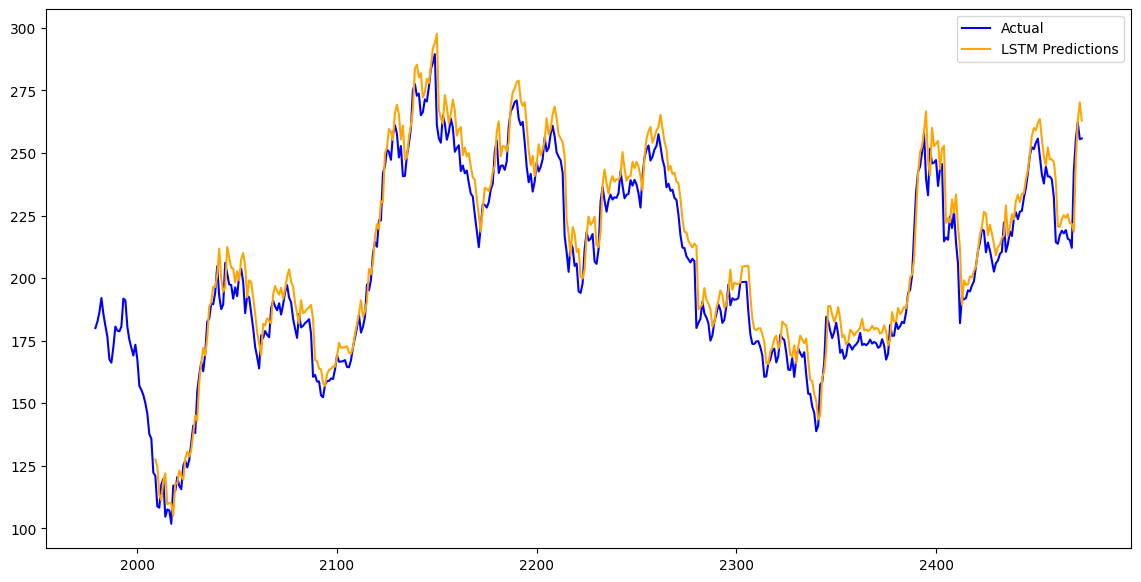

In [54]:
actual_VS_lstm_prediced(test_tsla,sequence_length,lstm_predictions_tsla)


> > ## Comparison of Actual and LSTM-Predicted for BND

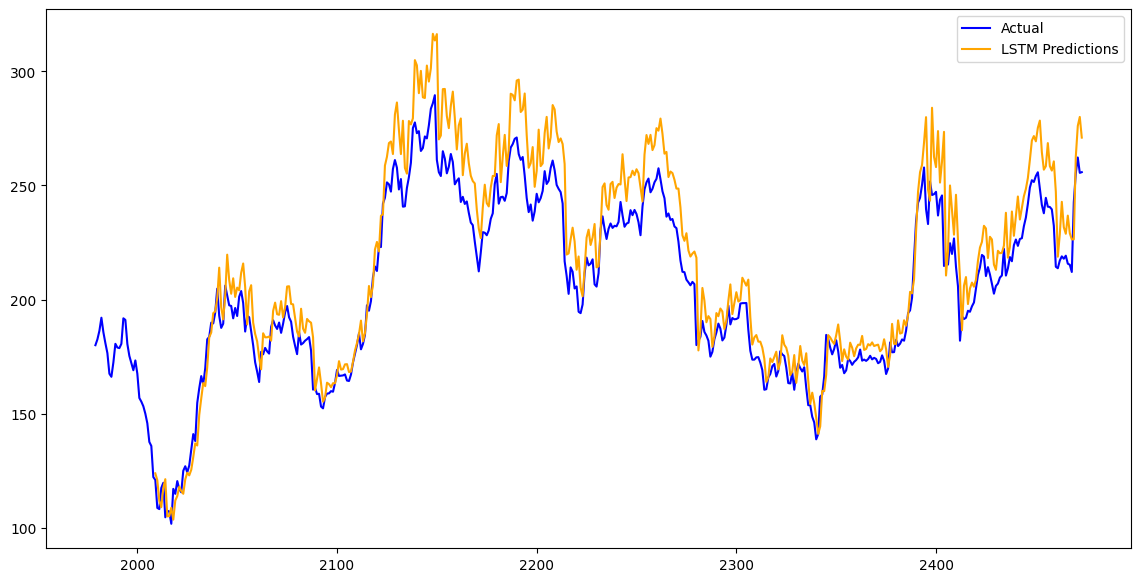

In [56]:
actual_VS_lstm_prediced(test_bnd,sequence_length,lstm_predictions_bnd)


> > ## Comparison of Actual and LSTM-Predicted for SPY

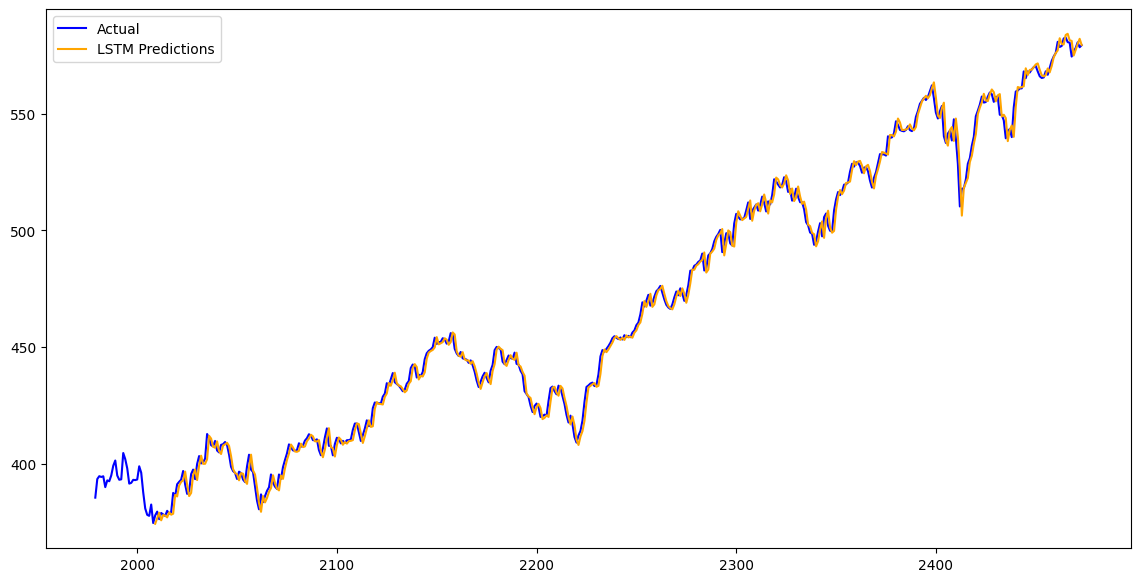

In [58]:
actual_VS_lstm_prediced(test_spy,sequence_length,lstm_predictions_spy)


In [59]:
import joblib


In [60]:
joblib.dump(lstm_model_tsla,'models/lstm_model_tsla.pkl')


['models/lstm_model_tsla.pkl']

> # 📊 Forecast Future Market Trends

> >  # For TSLA Data

In [61]:
lstm_model_tsla = joblib.load('models/lstm_model_tsla.pkl')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

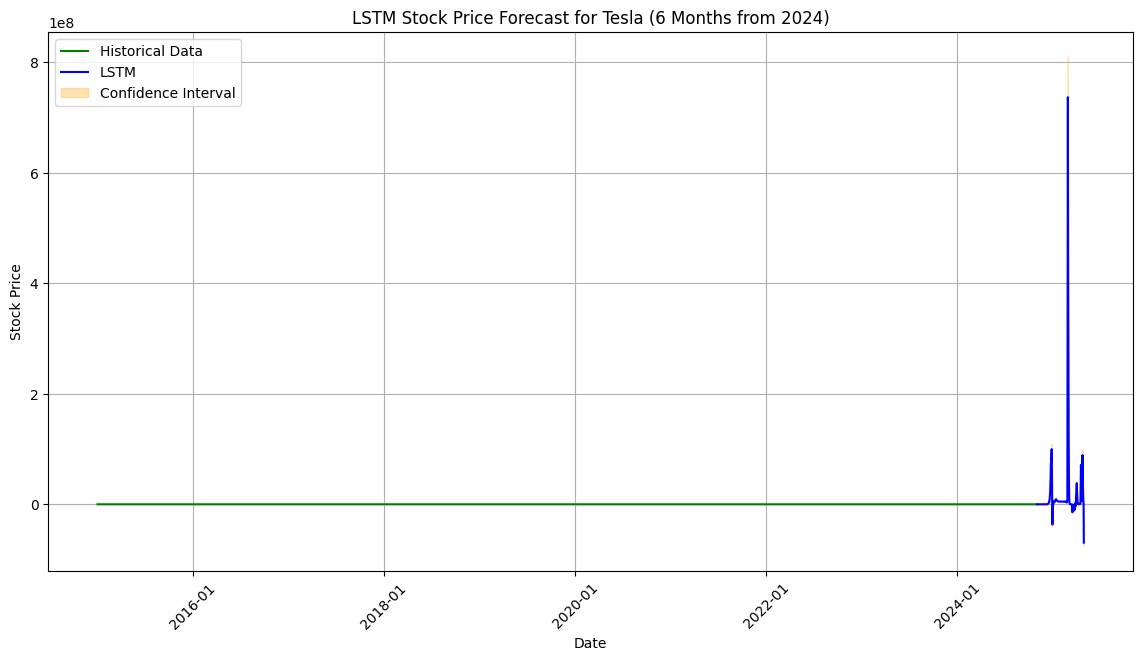

Trend Analysis:
The forecast suggests a stable or declining trend in the upcoming months.

Volatility and Risk Analysis:
The confidence interval suggests a 10.0% uncertainty in predicted prices.
Periods with wider intervals may indicate increased volatility.

Market Opportunities and Risks:
1. Opportunities: If the forecast shows a stable upward trend, there may be potential gains.
2. Risks: High volatility or a downward trend could pose risks, especially if confidence intervals widen significantly.


In [62]:
from scripts.portfolio import forecastFutureMarketTrend

forecastFutureMarketTrend(test_tsla,lstm_model_tsla,tsla_data)


> # 📈 Optimize Portfolio Based on Forecast

In [63]:
tsla_data.set_index('Date',inplace=True)
bnd_data.set_index('Date',inplace=True)
spy_data.set_index('Date',inplace=True)


In [64]:
tsla_data.rename(columns={"Close": "TSLA"}, inplace=True)
bnd_data.rename(columns={"Close": "BND"}, inplace=True)
spy_data.rename(columns={"Close": "SPY"}, inplace=True)

merged_df = pd.concat([tsla_data["TSLA"], bnd_data["BND"], spy_data["SPY"]], axis=1).dropna()


In [65]:
merged_df.head()


,TSLA,BND,SPY
Date,,,
2015-01-02 00:00:00+00:00,14.217333,82.419998,204.179993
2015-01-05 00:00:00+00:00,13.810667,82.699997,201.350006
2015-01-06 00:00:00+00:00,13.614000,83.029999,198.860001
2015-01-07 00:00:00+00:00,13.985333,83.050003,200.880005
2015-01-08 00:00:00+00:00,14.000667,82.970001,203.990005


In [66]:
df_returns = merged_df.pct_change().dropna()


Optimal Portfolio Allocation:
TSLA: 28.19%
BND: 0.00%
SPY: 71.81%

Expected Portfolio Return: 20.98%
Portfolio Volatility (Risk): 23.03%
Sharpe Ratio: 0.91

Value at Risk (VaR) for Tesla at 95% confidence level: -44.81%


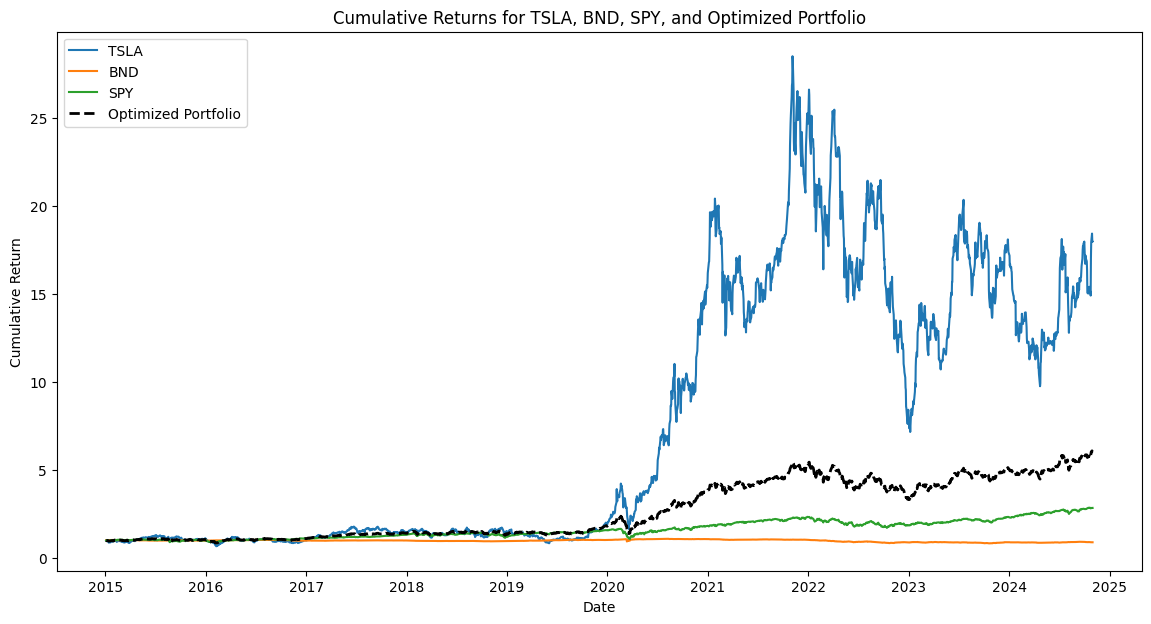


Portfolio Performance Summary:
Expected Annual Return: 20.98%
Annual Volatility (Risk): 23.03%
Sharpe Ratio: 0.91
Value at Risk (VaR) for TSLA: -44.81%


In [67]:
from scripts.portfolio import optimize_portfolio
optimize_portfolio(df_returns)
